/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


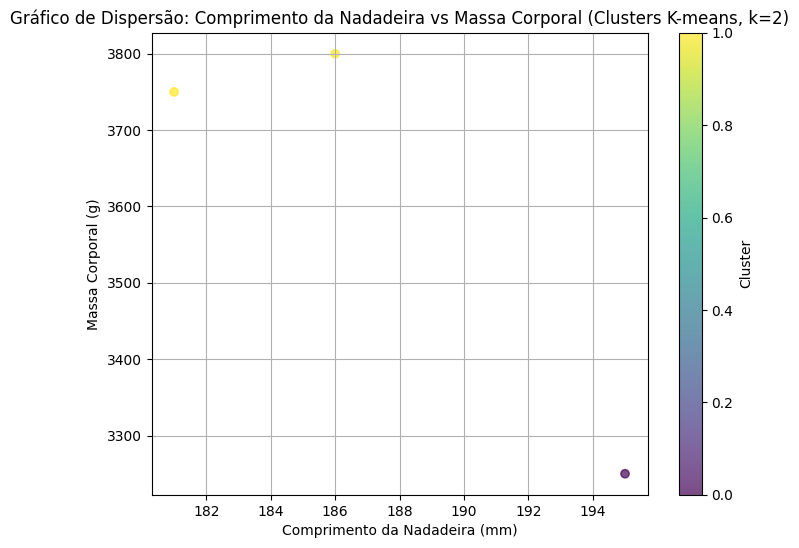

In [ ]:
# B)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Criar o DataFrame com os dados fornecidos
data = pd.DataFrame({
    'culmen_length_mm': [39.1, 39.5, 40.3, np.nan],
    'culmen_depth_mm': [18.7, 17.4, 18.0, np.nan],
    'flipper_length_mm': [181, 186, 195, np.nan],
    'body_mass_g': [3750, 3800, 3250, np.nan],
    'sex': ['MALE', 'FEMALE', 'FEMALE', np.nan]
})

# Remover linhas com valores ausentes
data = data.dropna()

# Selecionar apenas as colunas numéricas para clusterização
features = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Normalizar os dados para evitar influência de escalas diferentes
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar K-means com 2 clusters 
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizar os clusters em gráficos de dispersão
plt.figure(figsize=(8, 6))
plt.grid(True)

plt.scatter(data['flipper_length_mm'], data['body_mass_g'], c=data['Cluster'], cmap='viridis', alpha=0.7)
plt.title(f'Gráfico de Dispersão: Comprimento da Nadadeira vs Massa Corporal (Clusters K-means, k={k})')
plt.xlabel('Comprimento da Nadadeira (mm)')
plt.ylabel('Massa Corporal (g)')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# A)
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Carregar o dataset de diabetes
data = pd.read_csv('diabetes.csv')  

# Visualizar as primeiras linhas do dataset
print(data.head())

# Definir a variável alvo (Outcome) e as variáveis preditoras
X = data.drop(columns=['Outcome'])  # Variáveis preditoras
y = data['Outcome']  # Variável alvo

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Padronizar as características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Prever e calcular a acurácia
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Plotar a Curva ROC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title(f'Curva Característica de Operação do Receptor (ROC)\nAcurácia: {accuracy * 100:.2f}%')
plt.legend(loc="lower right")
plt.show()